# 初期化

In [9]:
import gc
from tqdm import tqdm
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
%reload_ext autoreload
%autoreload 2
import eda as eda



In [4]:
eda.init("usage")

# 分析

## データ読み込み

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names).merge(
    pd.DataFrame(iris.target).rename(columns={0:"target"})
    , left_index=True, right_index=True
)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.target = df.target.astype("category")

## データ概要

In [29]:
eda.describe(df)

データ形式


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
dtype,float64,float64,float64,float64,category


要約統計量（数値）


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500
欠損数,0.000,0.000,0.000,0.000
欠損率,0.000,0.000,0.000,0.000


要約統計量（数値以外）


,target
count,150.0
unique,3.0
top,2.0
freq,50.0
欠損数,0.0
欠損率,0.0


# プロット

## pandas plotを整形して保存

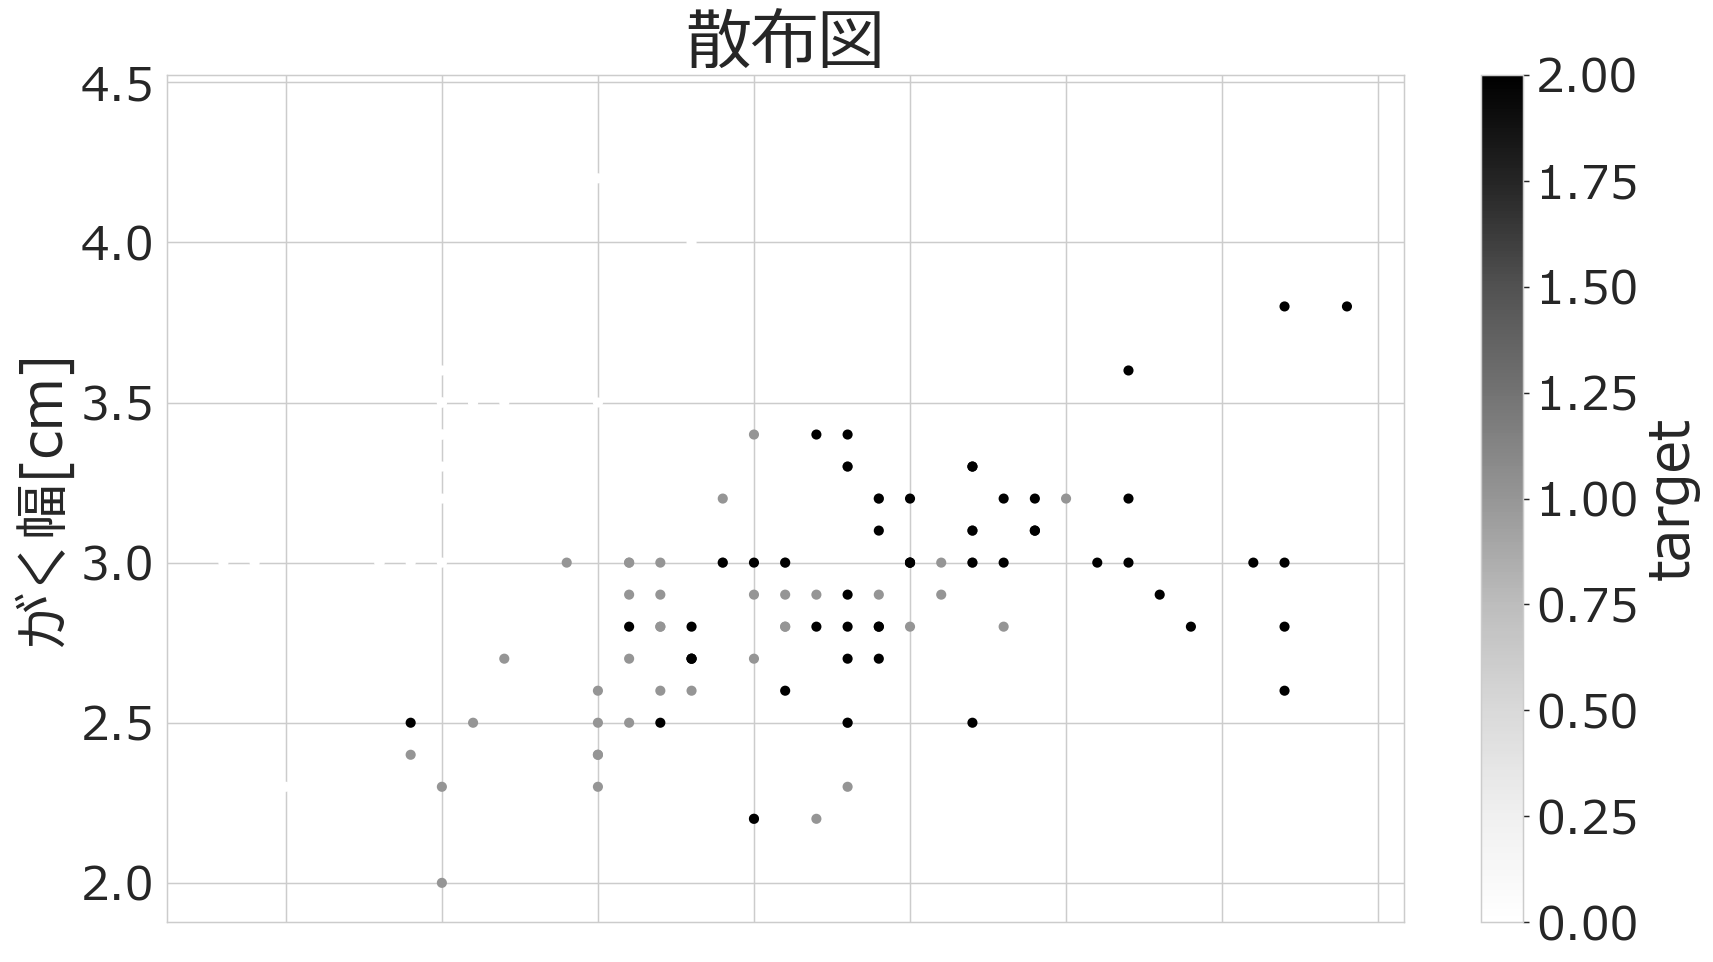

In [36]:
eda.plot(df.plot.scatter("sepal length (cm)","sepal width (cm)",c="target")
        ,tl="散布図", xl="がく長さ[cm]", yl="がく幅[cm]")

## seabornのGridを保存

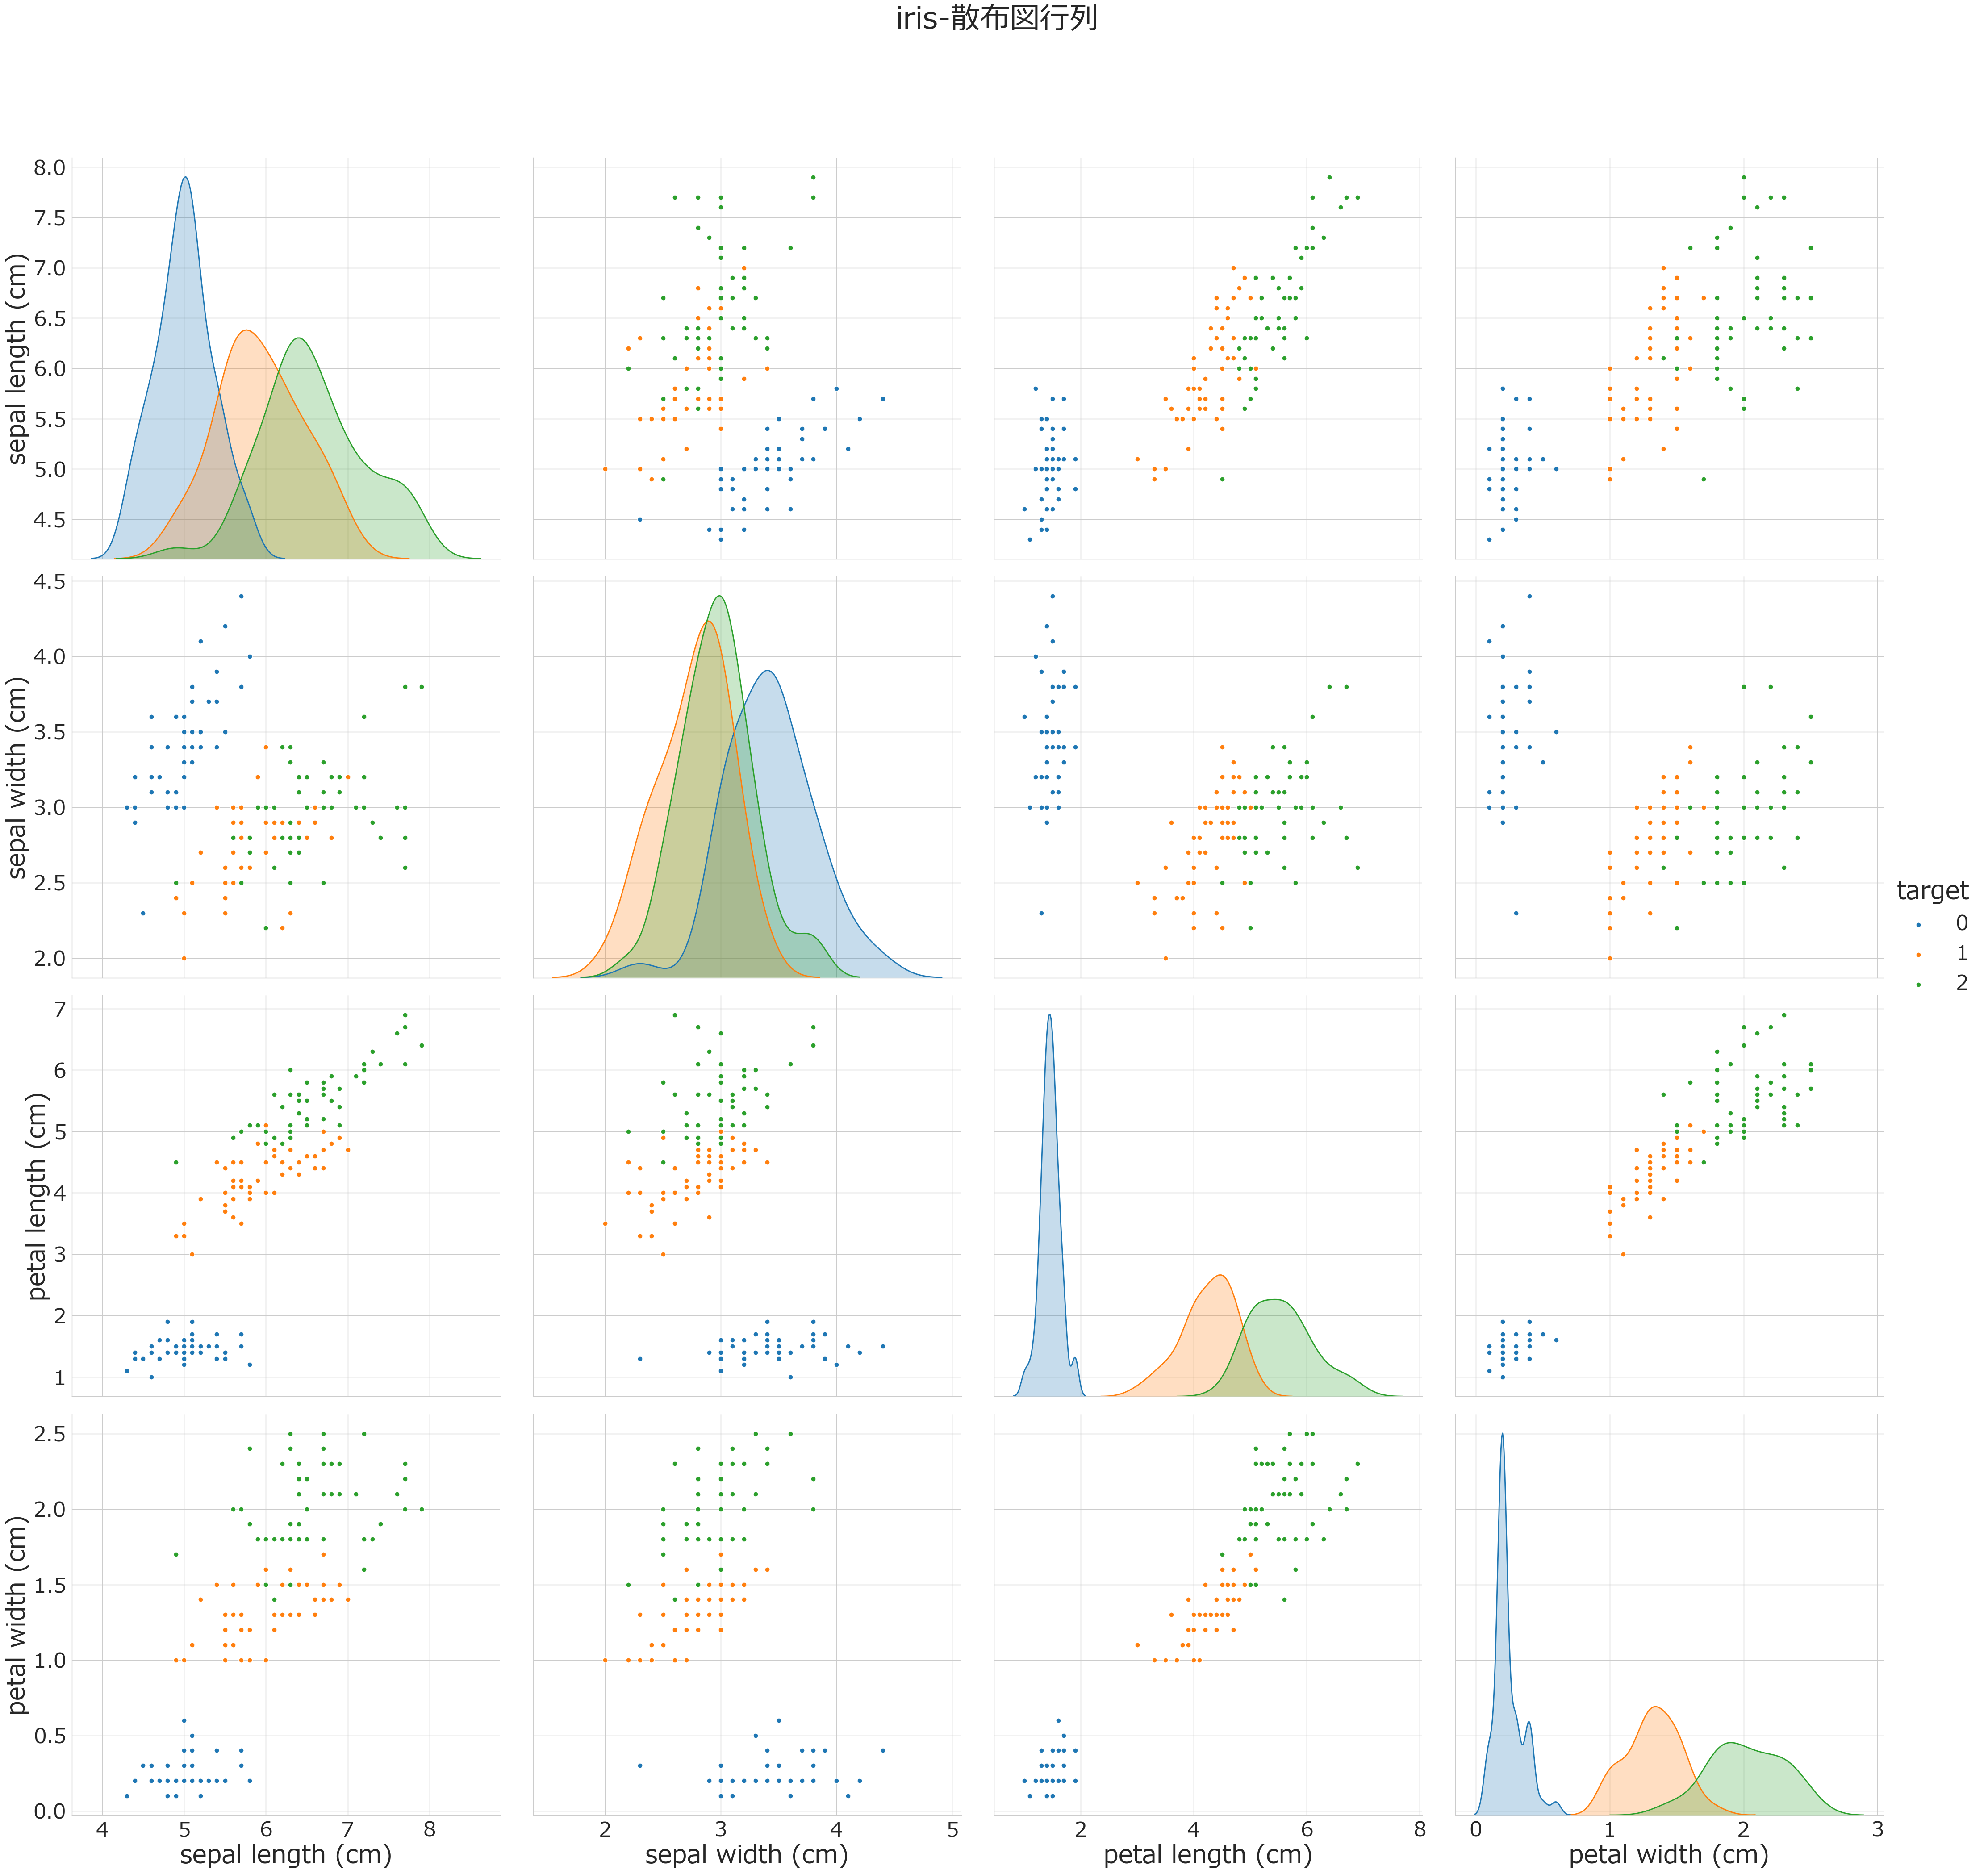

In [41]:
eda.plot(sns.pairplot(data=df, hue="target", height=8)
        ,tl="iris-散布図行列")